# Housing Sale Price Predictions

### Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
# from itertools import combinations

# Scikit-Learn Imports
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression, SelectKBest, RFE, RFECV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Random Seed Value
rand = 112

### Load the Data:

In [3]:
df = pd.read_csv('clean_train.csv')
test = pd.read_csv('clean_test.csv')

In [4]:
# # also drop 'SalePrice' because it is the target
# df.drop('SalePrice', axis = 1, inplace =True)
# drop PID ID

# Feature Engineering:

### Calculate Age:

In [5]:
# should I keep months in one-hot encoding it account for autocorrelation?

In [6]:
# # Calculate age of building and drop 'Year Built'
# df['Age'] = df['Yr Sold'] - df['Year Built']
# df.drop(columns=['Year Built'], axis = 1, inplace=True)

# test_df['Age'] = test_df['Yr Sold'] - test_df['Year Built']
# test_df.drop(columns=['Year Built'], axis = 1, inplace=True)

### Total Baths:

In [7]:
# # Calculate total baths and drop the columns its derived from
# df['Total Baths'] = df['Full Bath'] + df['Half Bath']/2 + df['Bsmt Full Bath'] + df['Bsmt Half Bath']/2
# df.drop(columns=['Half Bath', 'Full Bath', 'Bsmt Half Bath', 'Bsmt Full Bath'], axis = 1, inplace=True)

# test_df['Total Baths'] = test_df['Full Bath'] + test_df['Half Bath']/2 + test_df['Bsmt Full Bath'] + test_df['Bsmt Half Bath']/2
# test_df.drop(columns=['Half Bath', 'Full Bath', 'Bsmt Half Bath', 'Bsmt Full Bath'], axis = 1, inplace=True)

### Calculate number of months since start of first sale year:

In [8]:
# # Calculate number of months since start of first sale year
# df['Mo Sold After 1/1/2006'] = (df['Yr Sold'] - 2006) * 12 + df['Mo Sold']
# df.drop(columns=['Mo Sold'], axis = 1, inplace=True)

# test_df['Mo Sold After 1/1/2006'] = (test_df['Yr Sold'] - 2006) * 12 + test_df['Mo Sold']
# test_df.drop(columns=['Mo Sold'], axis = 1, inplace=True)

### Change remodel year to years since remodel:
The data will show age built if there was no remodel

In [9]:
# # change remodel year to years since remodel, the data will show age built if there was no remodel
# df['Yrs since Remodel'] = df['Yr Sold'] - df['Year Remod/Add']
# df.drop(columns=['Yr Sold', 'Year Remod/Add'], axis = 1, inplace=True)

# test_df['Yrs since Remodel'] = test_df['Yr Sold'] - test_df['Year Remod/Add']
# test_df.drop(columns=['Yr Sold', 'Year Remod/Add'], axis = 1, inplace=True)

### Calculate non-bdrm rooms abvgrd from bedrooms and rooms to reduce structural multicollinearity

In [10]:
# # calculate non-bdrm rooms abvgrd from bedrooms and rooms to reduce structural multicollinearity
# df['Non-bdrm Rooms AbvGrd'] = df['TotRms AbvGrd'] - df['Bedroom AbvGr']
# df.drop(columns=['TotRms AbvGrd'], axis = 1, inplace=True)

# test_df['Non-bdrm Rooms AbvGrd'] = test_df['TotRms AbvGrd'] - test_df['Bedroom AbvGr']
# test_df.drop(columns=['TotRms AbvGrd'], axis = 1, inplace=True)

# Polynomial Interaction Features:

In [11]:
# # make interaction terms
# pf = PolynomialFeatures(include_bias = False)
# poly_df = pf.fit_transform(pre_interact_df)
# column_names = pf.get_feature_names(pre_interact_df.columns)
# poly_df = pd.DataFrame(poly_df, columns = column_names)

# # do the same thing for the test set
# pf = PolynomialFeatures(include_bias = False)
# test_poly_df = pf.fit_transform(test_pre_interact_df)
# test_poly_df = pd.DataFrame(test_poly_df, columns = column_names)

 # Select Features:

In [12]:
# get features list from training data, except 'SalePrice'
all_features = list(df.columns)
features = [x for x in all_features if x not in ['SalePrice', 'Id', 'PID']]
# features = all_features.remove(['SalePrice', 'Id', 'PID'])

# make sure test_scaled_df has the same features as scaled_df
test_df = test[features]

# Create X predictor matrix and target
X = df[features]
y = df['SalePrice']

# Train-Test Split:

In [13]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y,
                                                          test_size = .3, random_state=rand)

# Scaling:

In [14]:
# Seperate one-hot encoded features so you don't scale them?
# try both ways

In [15]:
# Scaling
ss = StandardScaler()

# Fit to X_train and scale
sc_X_train = ss.fit_transform(X_train)
sc_X_train = pd.DataFrame(sc_X_train, columns=X.columns)


# Scale holout
sc_X_holdout = ss.transform(X_holdout)
sc_X_holdout = pd.DataFrame(sc_X_holdout, columns=X.columns)

# Scale test set
sc_test = ss.transform(test_df)
sc_test = pd.DataFrame(sc_test, columns=X.columns)

/Users/zachgreen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zachgreen/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zachgreen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Users/zachgreen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [16]:
# #add the dummies to the scaled dfs
# scaled_df = pd.concat([scaled_df, dummy_df], axis = 1)
# test_scaled_df = pd.concat([test_scaled_df, dummy_test_df], axis = 1)

### PCA

In [17]:
# Make sure to scale before PCA
pca = PCA(n_components = 35) #n_components = 2
pca = pca.fit(sc_X_train)

# Transform the data
pca_train = pca.transform(sc_X_train)
pca_holdout = pca.transform(sc_X_holdout)
pca_test = pca.transform(sc_test)

# How much of the variance is explained by the components
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

# Cumulative variance explained
cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [0.06000564 0.02960797 0.02542366 0.02132747 0.0204247  0.01843965
 0.01556305 0.01401317 0.01291752 0.01183552 0.01168151 0.01116369
 0.01080382 0.01043318 0.00990451 0.00962279 0.00944189 0.00921281
 0.00881038 0.0086435  0.00856313 0.00839539 0.00822715 0.00805614
 0.00794249 0.00778124 0.00769876 0.00747692 0.00733628 0.00726261
 0.00710455 0.00702221 0.00676962 0.00672236 0.00650453]
Cumulative explained variance:  [0.06000564 0.08961361 0.11503727 0.13636474 0.15678944 0.17522909
 0.19079214 0.20480531 0.21772283 0.22955835 0.24123987 0.25240355
 0.26320737 0.27364055 0.28354506 0.29316785 0.30260974 0.31182255
 0.32063293 0.32927643 0.33783957 0.34623496 0.35446211 0.36251825
 0.37046074 0.37824198 0.38594074 0.39341766 0.40075394 0.40801655
 0.4151211  0.42214331 0.42891293 0.43563529 0.44213982]


# Modeling Function: 
---

The following are necessary to save the results:

In [18]:
index_labels = ['Holdout score','Train score', 'Holdout RMSE', 'Best Params', 'Params Tried', 'Notes']

all_results = pd.DataFrame(index=index_labels)

# set dataframe options to display long strings rather than truncating them
pd.set_option('display.max_colwidth', 10000)

In [19]:
def fit_model(model, model_name, params, all_results, notes):
    start_time = time.time() # watch the clock
    
    # fit the model
    model = GridSearchCV(model, params, n_jobs=-1, cv = 3)
    model.fit(pca_train, y_train)
    
    # pick out the best model
    best_model = model.best_estimator_
    
    # make predictions
    pred = best_model.predict(pca_holdout)
    
    # Calculate results
    index_labels = ['Holdout score', 'Train score', 'Holdout RMSE', 'Best Params', 'Params Tried', 'Notes'] # 'Sensitivity', 'Specificity', 'Precision'
    result = pd.DataFrame(index = index_labels, columns=[model_name])
    result.loc['Holdout score'][model_name] = round(best_model.score(pca_holdout, y_holdout), 3)
    result.loc['Train score'][model_name] = round(model.best_score_, 3)
    result.loc['Holdout RMSE'][model_name] = round(sqrt(mean_squared_error(y_holdout, pred)), 3)
    result.loc['Best Params'][model_name] = model.best_params_
    result.loc['Params Tried'][model_name] = params
    result.loc['Notes'][model_name] = notes

    display(result.head(3)) # display test results
    display(result.tail(3)) # display parameters and notes

    # add results and params to all_results and all_params
    all_results = pd.concat([all_results, result], axis=1)
    
    # plot actual vs. predicted
    fig, ax = plt.subplots(figsize=(8,6))
    plt.scatter(y_holdout, pred)
    ax.set_xlabel('True Values', size = 20)
    ax.set_ylabel('Predictions', size = 20)
    plt.title('Predictions vs. Actual', size = 20)
    ax.grid()
    plt.plot([0, 600000], [0, 600000], 'k--', lw=3)
    
    # print the runtime
    end_time = time.time()
    print('Runtime: ', round((end_time - start_time)/60, 3), ' minutes')
    
    return all_results, best_model, pred # all_params

# Model Mania!!!

In [20]:
# Retune everything with new data

### Linear Regression

,Linear Reg
Holdout score,0.84
Train score,0.779
Holdout RMSE,31693.9


,Linear Reg
Best Params,{'normalize': True}
Params Tried,"{'normalize': [True, False]}"
Notes,


Runtime:  0.064  minutes


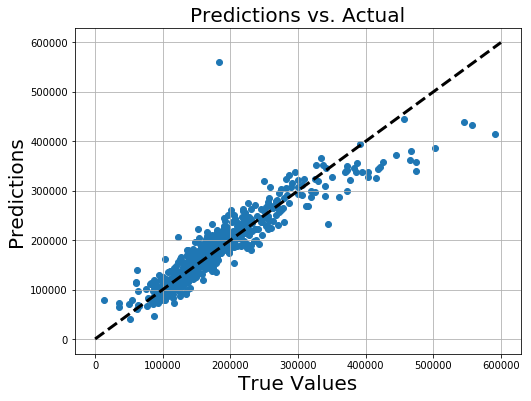

In [21]:
# set parameters
lr_params = {
            'normalize': [True, False]
}

lr_notes = ''

# call the fit_model function
all_results, lr_best_model, lr_preds = fit_model(LinearRegression(), 
                                                 'Linear Reg', 
                                                 lr_params, 
                                                 all_results, 
                                                 lr_notes,
                                                )

### Random Forest

,Random Forest
Holdout score,0.875
Train score,0.869
Holdout RMSE,28011.1


,Random Forest
Best Params,"{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 100}"
Params Tried,"{'n_estimators': [100], 'min_samples_split': [7], 'min_samples_leaf': [2], 'bootstrap': [True], 'max_depth': [None], 'max_leaf_nodes': [None], 'max_features': ['auto']}"
Notes,"Picked min_samples_leaf=1, bootstrap=True, n_estimators=100, min_samples_leaf=2"


Runtime:  0.1  minutes


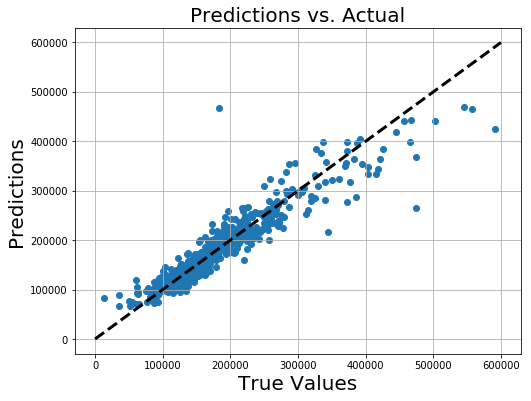

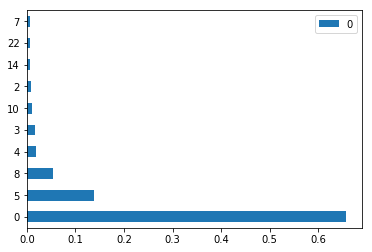

In [22]:
# set parameters
rf_params = {
            'n_estimators': [100],
            'min_samples_split': [7],
            'min_samples_leaf': [2],
            'bootstrap': [True],
            'max_depth':[None],
            'max_leaf_nodes': [None],
            'max_features': ['auto'], # max_feat_to_check
}

rf_notes = 'Picked min_samples_leaf=1, bootstrap=True, n_estimators=100, min_samples_leaf=2'

# call the fit_model function
all_results, rf_best_model, rf_preds = fit_model(RandomForestRegressor(), 
                                                 'Random Forest', 
                                                 rf_params, 
                                                 all_results, 
                                                 rf_notes,
                                                )

# Top features
feat_importance = pd.DataFrame(rf_best_model.feature_importances_).sort_values(by=0, ascending=False) #index=pca_train.columns
feat_importance.head(10).plot(kind='barh')

,SVM
Holdout score,0.76
Train score,0.713
Holdout RMSE,38758.3


,SVM
Best Params,"{'C': 10, 'kernel': 'linear'}"
Params Tried,"{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.5, 1, 3, 4, 5, 10]}"
Notes,


Runtime:  0.094  minutes


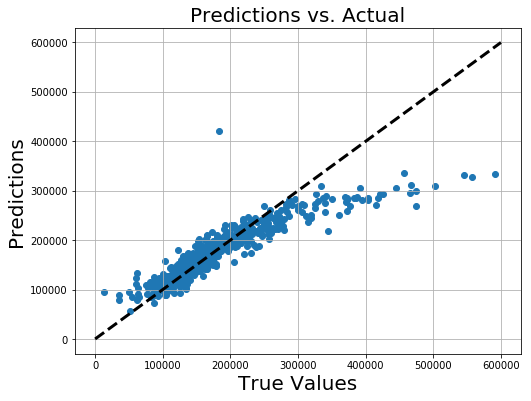

In [23]:
# set parameters
svm_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], # 'precomputed'
    'C' : [.5, 1, 3, 4, 5, 10]
}

svm_notes = ''

# call the fit_model function
all_results, svm_best_model, svm_preds = fit_model(svm.SVR(), 'SVM', svm_params, all_results, svm_notes,
                                                  )


,KNN
Holdout score,0.84
Train score,0.825
Holdout RMSE,31684.8


,KNN
Best Params,"{'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}"
Params Tried,"{'n_neighbors': [3, 4, 5, 7, 10, 15], 'weights': ['distance'], 'metric': ['minkowski'], 'p': [1, 2, 3]}"
Notes,


Runtime:  0.301  minutes


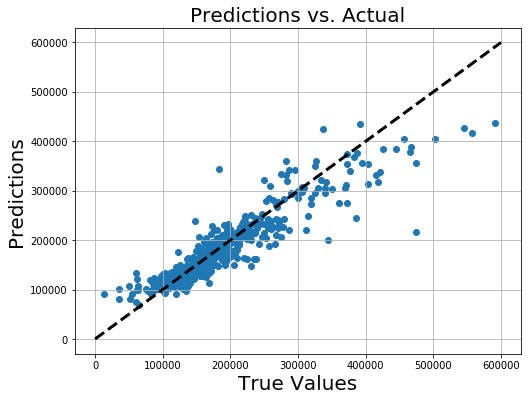

In [24]:
# set parameters
knn_params = {
    'n_neighbors': [3, 4, 5, 7, 10, 15],
    'weights': ['distance'], # uniform
    'metric': ['minkowski'],
    'p': [1, 2, 3] # p = 1 and 2 correspondes to Manhattan and Euclidean distance metrics repsectively
}

knn_notes = ''

# call the fit_model function
all_results, knn_best_model, knn_preds = fit_model(KNeighborsRegressor(), 'KNN',
                                                   knn_params, all_results, knn_notes,
                                                  )


,Grad. Boost
Holdout score,0.822
Train score,0.826
Holdout RMSE,33434.3


,Grad. Boost
Best Params,"{'learning_rate': 0.1, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140}"
Params Tried,"{'learning_rate': [0.1], 'n_estimators': [110, 125, 140], 'min_samples_split': [2], 'min_samples_leaf': [2], 'max_depth': [None], 'max_leaf_nodes': [None], 'max_features': ['auto']}"
Notes,


Runtime:  0.471  minutes


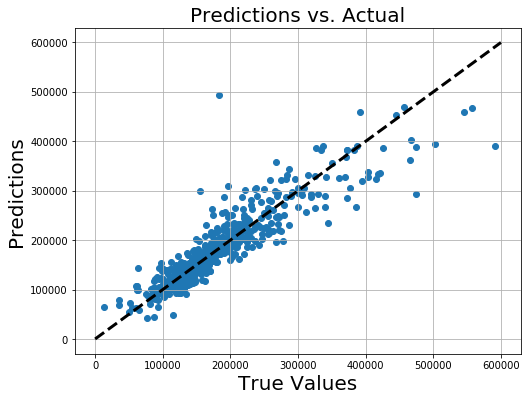

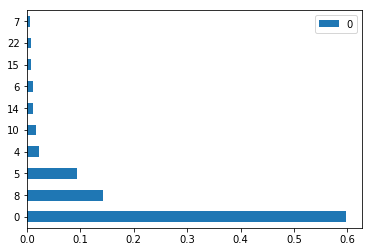

In [25]:
# set parameters
gb_params = {
            'learning_rate' : [0.1],
            'n_estimators': [110, 125, 140],
            'min_samples_split': [2],
            'min_samples_leaf': [2],
            'max_depth':[None],
            'max_leaf_nodes': [None],
            'max_features': ['auto'], # max_feat_to_check
}

gb_notes = ''

# call the fit_model function
all_results, gb_best_model, gb_preds = fit_model(GradientBoostingRegressor(), 
                                                 'Grad. Boost', 
                                                 gb_params, 
                                                 all_results, 
                                                 gb_notes,
                                                )

# Top features
feat_importance = pd.DataFrame(gb_best_model.feature_importances_).sort_values(by=0, ascending=False)
feat_importance.head(10).plot(kind='barh')

# Overall Results:

In [26]:
display(all_results.head(3))
display(all_results.tail(3))

,Linear Reg,Random Forest,SVM,KNN,Grad. Boost
Holdout score,0.84,0.875,0.76,0.84,0.822
Train score,0.779,0.869,0.713,0.825,0.826
Holdout RMSE,31693.9,28011.1,38758.3,31684.8,33434.3


,Linear Reg,Random Forest,SVM,KNN,Grad. Boost
Best Params,{'normalize': True},"{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 100}","{'C': 10, 'kernel': 'linear'}","{'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}","{'learning_rate': 0.1, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140}"
Params Tried,"{'normalize': [True, False]}","{'n_estimators': [100], 'min_samples_split': [7], 'min_samples_leaf': [2], 'bootstrap': [True], 'max_depth': [None], 'max_leaf_nodes': [None], 'max_features': ['auto']}","{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.5, 1, 3, 4, 5, 10]}","{'n_neighbors': [3, 4, 5, 7, 10, 15], 'weights': ['distance'], 'metric': ['minkowski'], 'p': [1, 2, 3]}","{'learning_rate': [0.1], 'n_estimators': [110, 125, 140], 'min_samples_split': [2], 'min_samples_leaf': [2], 'max_depth': [None], 'max_leaf_nodes': [None], 'max_features': ['auto']}"
Notes,,"Picked min_samples_leaf=1, bootstrap=True, n_estimators=100, min_samples_leaf=2",,,


# Make Predictions:

In [104]:
# test['SalePrice'] = rf_best_model.predict(pca_test) #test_scaled_df
# test[['Id', 'SalePrice']].sort_values(by='Id').to_csv('submissions.csv',index=False)

## Kaggle Submission Links:

Class Leaderboard: <br>
https://www.kaggle.com/c/dsi-us-5-project-2-regression-challenge <br>
<br>
General Kaggle Challenge: (used different data) <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard